Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [3]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [4]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [5]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

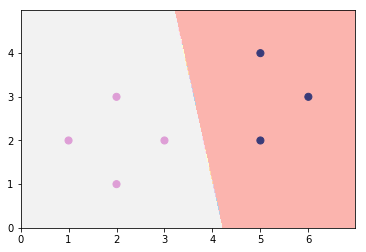

In [6]:
# Vaš kôd ovdje
from mlutils import *

model = RidgeClassifier(alpha=0.0)
model.fit(seven_X, seven_y)

model.score(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, model.predict)


Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

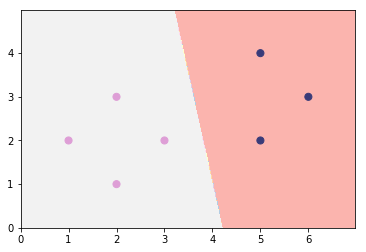

In [7]:
# Vaš kôd ovdje
model = LinearRegression()

# seven_y = np.array([1, 1, 1, 1, -1, -1, -1])
model.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, lambda x : model.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [8]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

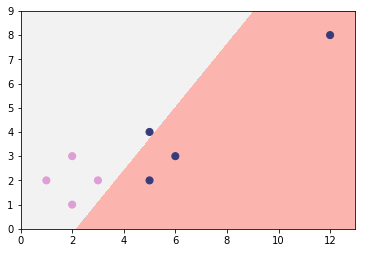

In [9]:
# Vaš kôd ovdje

model = LinearRegression()
model.fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, lambda x : model.predict(x) >= 0.5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [10]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

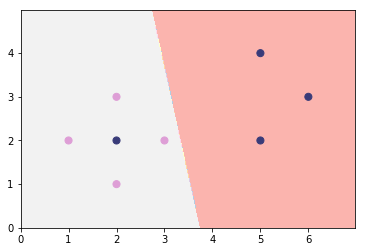

In [11]:
# Vaš kôd ovdje

model = LinearRegression()
model.fit(unsep_X, unsep_y)

plot_2d_clf_problem(unsep_X, unsep_y, lambda x : model.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [12]:
from sklearn.datasets import make_classification

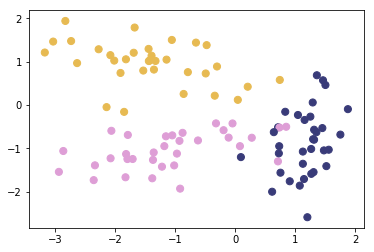

In [13]:
# Vaš kôd ovdje

X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
y_train = [1 if j == 2 else 0 for j in y]

plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

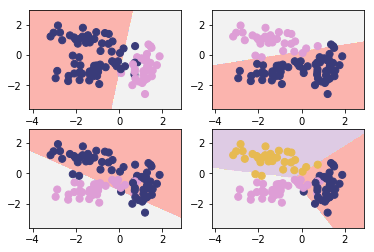

In [14]:
# Vaš kôd ovdje

models = []
y_train_adapted = []

f, ax = plt.subplots(2, 2)

for i in range(3):
    model = LinearRegression()
    models.append(model)
    
    y_train = [1 if j == i else 0 for j in y]
    y_train_adapted.append(y_train)
    
    model.fit(X, y_train)

    plt.subplot(2,2,i+1)
    plot_2d_clf_problem(X, y_train, lambda x: model.predict(x) >= 0.5)

def predict(models, x):
    return np.argmax([model.predict(np.array([x])) for model in models])
    
plt.subplot(2,2,4)
plot_2d_clf_problem(X, y, lambda x : predict(models, x))

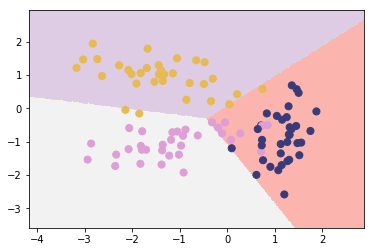

In [15]:
clf = RidgeClassifier(alpha=0.0)
clf.fit(X, y)

plot_2d_clf_problem(X, y, clf.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

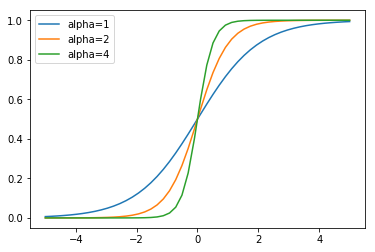

In [16]:
# Vaš kôd ovdje
alphas = [1,2,4]
x = np.linspace(-5, 5, 50)

def sigmoid(x, alpha):
    return 1.0 / (1 + np.exp(-alpha * x))

for a in alphas:    
    plt.plot(x, sigmoid(x, a), label="alpha="+str(a))
    
plt.legend()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [37]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
import random

def lr_h(x, w): 
    return sigmoid(w.T.dot(x), 1)
    return 1.0 if sigmoid(w.T.dot(x), 1) >= 0.5 else 0.0

def cross_entropy_error(X, y, w): 
    N = len(X)
    error = 0.0
    
    for i in range(N):
        hx = lr_h(X[i], w)
        error += -y[i] * np.log(hx) - (1 - y[i]) * np.log(1 - hx)
        if error == float("inf"):
            print("hx is", hx, "y[i]", y[i])

    error = error / N
    return error

def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, alpha=0, epsilon=0.000001):
    count = 0
    error_diff = epsilon + 1.0 # so it passes the while loop condition 1st time
    
    poly = PolynomialFeatures(1)
    phi = poly.fit_transform(X)
    
    ws = []
    w = []
    w = np.zeros(len(phi[0]))
    
    if trace == True:
        ws.append(w)
    error = cross_entropy_error(phi, y, w)
    
    while count < max_iter and error_diff > epsilon:
        count += 1
        dw0 = 0
        dw = np.zeros(len(w))
        suma = np.zeros(len(w))
        for i in range(len(phi)):
            hx = lr_h(phi[i], w)
            dw0 = dw0 - (hx - y[i])
            dw -= (hx - y[i]) * phi[i]
            
        w[0] += eta * dw0
        w[1:] = w[1:] * (1.0 - eta * alpha) + eta * dw[1:]
        
        if trace == True:
            ws.append(w.copy())
        
        new_error = cross_entropy_error(phi, y, w)
        error_diff = error - new_error        
    
    if trace == True:
        return w, ws

    return w


#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 4.90521002 -1.12506945 -0.24133993]


0.15209134508470193

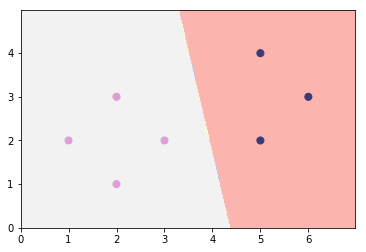

In [38]:
w = lr_train(seven_X, seven_y, max_iter=2000, alpha=1.0)

print(w)

plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(np.hstack((np.array([1]), x)), w) >= 0.5)

cross_entropy_error([np.hstack((np.array([1]), x)) for x in seven_X], seven_y, w)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

[1, 1, 1, 1, 0, 0, 0]


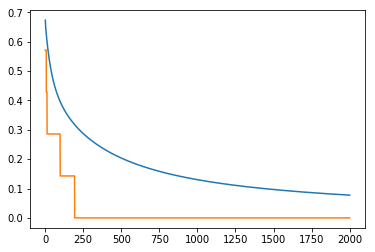

In [48]:
from sklearn.metrics import zero_one_loss

w, w_trace = lr_train(seven_X, seven_y, max_iter=2000, trace=True)

ce_errors = []
zo_errors = []

def my_zero_one_loss(X, y, w):
    N = len(X)
    values = []
    
    for i in range(N):
        hx = lr_h(X[i], w) >= 0.5
        values.append(hx)

    return zero_one_loss(y, values)


for weights in w_trace:
    err = cross_entropy_error([np.hstack((np.array([1]), x)) for x in seven_X], seven_y, weights)
    ce_errors.append(err)
    zo_errors.append(my_zero_one_loss([np.hstack((np.array([1]), x)) for x in seven_X], seven_y, weights))

ce_errors = ce_errors[1:]
zo_errors = zo_errors[1:]
ks = [i for i in range(len(w_trace))]
plt.plot(ks[1:], ce_errors)
plt.plot(ks[1:], zo_errors)

# print(ce_errors)
print([int(lr_h(np.hstack((np.array([1]), x)), w) >= 0.5) for x in seven_X])

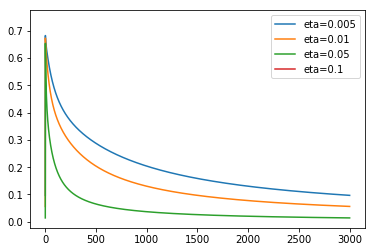

In [42]:
f.set_figheight(8)
f.set_figwidth(8)
f.tight_layout()
etas = [0.005, 0.01, 0.05, 0.1]

for i in range(len(etas)):
    w, w_trace = lr_train(seven_X, seven_y, max_iter=3000, trace=True, eta=etas[i])
    ks = [i for i in range(len(w_trace))]
    ce_errors = []
    for weights in w_trace:
        ce_errors.append(cross_entropy_error([np.hstack((np.array([1]), x)) for x in seven_X], seven_y, weights))
    
    plt.plot(ks, ce_errors, label="eta="+str(etas[i]))
    
plt.legend()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [21]:
from sklearn.linear_model import LogisticRegression

[[-1.18244419 -0.30251926]]
[5.33129609]


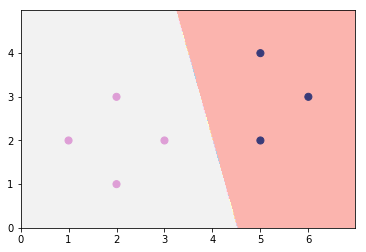

In [43]:
model = LogisticRegression(solver="lbfgs")
model.fit(seven_X, seven_y)

model.predict(seven_X)
print(model.coef_)
print(model.intercept_)

plot_2d_clf_problem(seven_X, seven_y, model.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

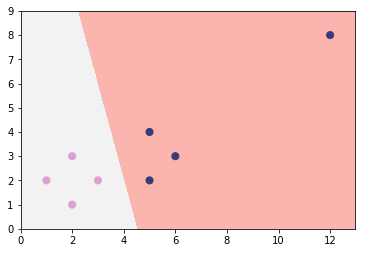

In [23]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

model = LogisticRegression(solver="lbfgs")
model.fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, model.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


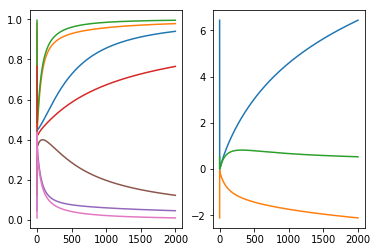

In [46]:
def logisticRegressionAnalysis(X, y):
    w, w_trace = lr_train(X, y, max_iter=2000, trace=True)

    f, (ax1, ax2) = plt.subplots(1,2)

    values = []
    for i in range(len(X)):
        values.append([])

    weight_values = [[], [], []]
    ks = [i for i in range(len(w_trace))]

    for weights in w_trace:
        for i in range(len(weights)):
            weight_values[i].append(weights[i])

        for i in range(len(X)):
            x = np.hstack((np.array([1]), X[i]))
            values[i].append(lr_h(x, weights))

    for i in range(len(values)):
        ax1.plot(ks, values[i])    

    for i in range(len(weight_values)):
        ax2.plot(ks, weight_values[i])
    
logisticRegressionAnalysis(seven_X, seven_y)

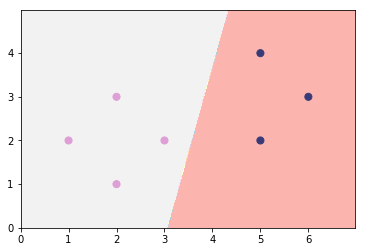

In [49]:
plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(np.hstack((np.array([1]), x)), w) >= 0.5)

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

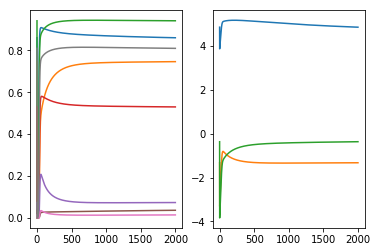

In [26]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

logisticRegressionAnalysis(unsep_X, unsep_y)

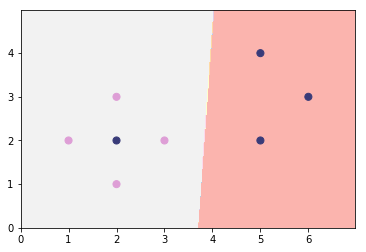

In [27]:
plot_2d_clf_problem(unsep_X, unsep_y, lambda x: lr_h(np.hstack((np.array([1]), x)), w) >= 0.5)

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [28]:
from numpy.linalg import norm

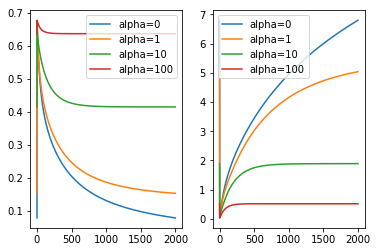

In [50]:
alphas = [0, 1, 10, 100]

f, (ax1, ax2) = plt.subplots(1,2)

errors = []
norms = []

for i in range(len(alphas)):
    alpha = alphas[i]
    w, w_trace = lr_train(seven_X, seven_y, trace=True, alpha=alpha)
    ks = [i for i in range(len(w_trace))]
    errors.append([])
    norms.append([])
    for k in ks:
        errors[i].append(cross_entropy_error([np.hstack((np.array([1]), x)) for x in seven_X], seven_y, w_trace[k]))
        norms[i].append(norm(w_trace[k]))
    
for j in range(len(alphas)):
    ax1.plot(ks, errors[j], label="alpha="+str(alphas[j]))
    ax2.plot(ks, norms[j], label="alpha="+str(alphas[j]))

ax1.legend()
ax2.legend()
        

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

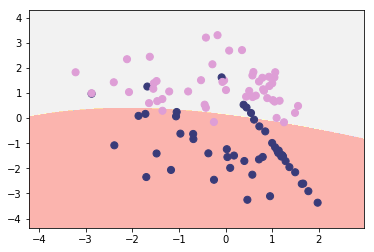

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2)
plot_2d_clf_problem(X, y)

poly = PolynomialFeatures(2)
phi = poly.fit_transform(X)

model = LogisticRegression(solver="lbfgs")
model.fit(phi, y)

mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

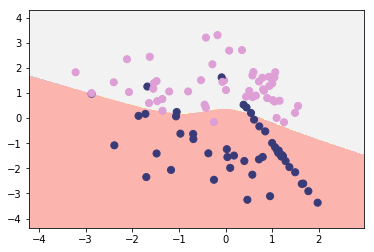

In [52]:
poly = PolynomialFeatures(3)
phi = poly.fit_transform(X)

model = LogisticRegression(solver="lbfgs")
model.fit(phi, y)

mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?